In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [50]:
data=pd.read_csv('training_data_2.csv')

In [51]:
test=pd.read_csv('test_data_2.csv')

In [52]:
data=data.drop('Unnamed: 0', axis=1)
test=test.drop('Unnamed: 0', axis=1)

In [53]:
label_encoder = LabelEncoder()

In [54]:
data.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,...,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,995,other,1390.000000,other,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,...,90s,gravity,annually,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,200.0,272,other,1399.000000,other,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,...,10s,gravity,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,281,other,686.000000,other,37.460664,-3.821329,Pangani,Majengo,Manyara,...,00s,gravity,per bucket,soft,enough,dam,surface,communal standpipe multiple,communal standpipe,functional
3,50.0,309,Unicef,263.000000,other,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,80s,submersible,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,250.0,874,other,1057.545585,other,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,...,unknown,gravity,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [55]:
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
test.iloc[:,0] = label_encoder.fit_transform(test.iloc[:,0]).astype('float64')

In [56]:
data.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,...,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,62.0,995,other,1390.000000,other,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,...,90s,gravity,annually,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,25.0,272,other,1399.000000,other,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,...,10s,gravity,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,12.0,281,other,686.000000,other,37.460664,-3.821329,Pangani,Majengo,Manyara,...,00s,gravity,per bucket,soft,enough,dam,surface,communal standpipe multiple,communal standpipe,functional
3,18.0,309,Unicef,263.000000,other,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,80s,submersible,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,27.0,874,other,1057.545585,other,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,...,unknown,gravity,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [57]:
corr = data.corr()

In [58]:
corr

,amount_tsh,days_since_recorded,gps_height,longitude,latitude,population
amount_tsh,1.000000,0.178297,0.239961,-0.148192,-0.121791,-0.024886
days_since_recorded,0.178297,1.000000,-0.137255,0.048938,-0.256633,-0.086592
gps_height,0.239961,-0.137255,1.000000,-0.274860,0.284231,-0.025937
longitude,-0.148192,0.048938,-0.274860,1.000000,-0.425802,-0.099771
latitude,-0.121791,-0.256633,0.284231,-0.425802,1.000000,0.102269
population,-0.024886,-0.086592,-0.025937,-0.099771,0.102269,1.000000


In [59]:
integer_columns = ['days_since_recorded', 'population','gps_height','longitude','latitude','amount_tsh', 'population']
categorical_cols=[col for col in data.columns if col not in integer_columns]

In [60]:
from sklearn.preprocessing import LabelEncoder
data[categorical_cols]=data[categorical_cols].apply(LabelEncoder().fit_transform)

In [61]:
data.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,...,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,62.0,995,8,1390.000000,7,34.938093,-9.856322,1,11807,3,...,5,1,0,6,1,6,0,1,1,0
1,25.0,272,8,1399.000000,7,34.698766,-2.147466,4,15838,9,...,1,1,2,6,2,3,1,1,1,0
2,12.0,281,8,686.000000,7,37.460664,-3.821329,5,9074,8,...,0,1,5,6,1,1,1,2,1,0
3,18.0,309,3,263.000000,7,38.486161,-11.155298,7,8982,12,...,4,8,2,6,0,0,0,2,1,2
4,27.0,874,8,1057.545585,7,31.130847,-1.825359,4,7698,4,...,6,1,2,6,3,3,1,1,1,0


In [62]:
corr=data.corr()

In [63]:
corr

,amount_tsh,days_since_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,...,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
amount_tsh,1.000000,0.178297,-0.073544,0.239961,-0.088914,-0.148192,-0.121791,-0.077444,-0.043323,0.093536,...,0.105198,-0.072663,-0.389181,0.028363,-0.010587,0.083274,0.010639,0.009254,0.006656,-0.044921
days_since_recorded,0.178297,1.000000,-0.054307,-0.137255,-0.090383,0.048938,-0.256633,0.215408,-0.059879,-0.018730,...,0.169050,0.019294,-0.273204,-0.000065,-0.040233,0.062734,0.040683,-0.060015,-0.044362,-0.028992
funder,-0.073544,-0.054307,1.000000,-0.025098,0.154870,-0.029354,0.129598,0.022691,0.011657,0.034702,...,-0.068286,0.049989,0.095296,-0.063741,-0.011148,-0.074819,0.003931,0.012562,0.009434,-0.043570
gps_height,0.239961,-0.137255,-0.025098,1.000000,-0.098448,-0.274860,0.284231,-0.528646,-0.038761,-0.208046,...,0.100815,-0.249200,-0.082505,0.116012,-0.014288,0.204156,-0.037071,-0.090798,-0.080919,-0.122505
installer,-0.088914,-0.090383,0.154870,-0.098448,1.000000,0.153143,-0.007988,0.080358,-0.011520,-0.024024,...,-0.141000,0.035103,0.078990,-0.003624,0.082401,-0.138065,0.021601,-0.007337,-0.012208,-0.013457
longitude,-0.148192,0.048938,-0.029354,-0.274860,0.153143,1.000000,-0.425802,0.216088,0.009328,-0.142783,...,-0.320469,-0.067787,-0.007441,-0.051622,0.015785,-0.047479,0.020594,-0.163355,-0.144605,0.004366
latitude,-0.121791,-0.256633,0.129598,0.284231,-0.007988,-0.425802,1.000000,-0.218502,-0.007440,-0.025485,...,0.155502,0.036418,0.145438,-0.010955,0.117193,0.064626,-0.040928,0.160127,0.146218,-0.014547
basin,-0.077444,0.215408,0.022691,-0.528646,0.080358,0.216088,-0.218502,1.000000,0.057696,-0.114880,...,-0.214819,0.131235,-0.029961,-0.075529,-0.026707,-0.074808,0.031636,0.009864,0.013518,0.043413
subvillage,-0.043323,-0.059879,0.011657,-0.038761,-0.011520,0.009328,-0.007440,0.057696,1.000000,-0.011206,...,-0.042279,0.004133,0.022473,0.002076,0.006003,-0.025664,-0.012342,-0.017225,-0.019984,-0.006752
region,0.093536,-0.018730,0.034702,-0.208046,-0.024024,-0.142783,-0.025485,-0.114880,-0.011206,1.000000,...,0.164590,0.277008,0.056709,-0.073382,0.034766,-0.140439,-0.010899,0.279421,0.257183,0.091252


In [64]:
sns.heatmap(corr)

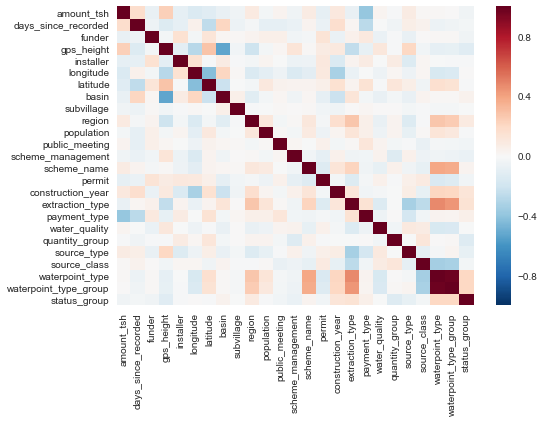

In [65]:
plt.show()

In [66]:
data.shape

(59400, 25)

In [67]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [68]:
data.shape

(59400, 24)

In [69]:
data.columns

Index(['amount_tsh', 'days_since_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'basin', 'subvillage', 'region',
       'population', 'public_meeting', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type', 'payment_type',
       'water_quality', 'quantity_group', 'source_type', 'source_class',
       'waterpoint_type', 'status_group'],
      dtype='object')

In [70]:
selected_columns = selected_columns[1:].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [72]:
result = pd.DataFrame()
result['status_group'] = data.iloc[:,-1]

In [74]:
result.head()

,status_group
0,0
1,0
2,0
3,2
4,0


In [75]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [76]:
data.head()

,days_since_recorded,funder,gps_height,installer,longitude,latitude,basin,region,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type
0,995.0,8.0,1390.000000,7.0,34.938093,-9.856322,1.0,3.0,1.0,6.0,2246.0,0.0,5.0,1.0,0.0,6.0,1.0,6.0,0.0,1.0
1,272.0,8.0,1399.000000,7.0,34.698766,-2.147466,4.0,9.0,2.0,2.0,2171.0,1.0,1.0,1.0,2.0,6.0,2.0,3.0,1.0,1.0
2,281.0,8.0,686.000000,7.0,37.460664,-3.821329,5.0,8.0,1.0,6.0,2121.0,1.0,0.0,1.0,5.0,6.0,1.0,1.0,1.0,2.0
3,309.0,3.0,263.000000,7.0,38.486161,-11.155298,7.0,12.0,1.0,6.0,2171.0,1.0,4.0,8.0,2.0,6.0,0.0,0.0,0.0,2.0
4,874.0,8.0,1057.545585,7.0,31.130847,-1.825359,4.0,4.0,1.0,2.0,2171.0,1.0,6.0,1.0,2.0,6.0,3.0,3.0,1.0,1.0


In [77]:
data.shape

(59400, 20)

In [78]:
data.columns

Index(['days_since_recorded', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'public_meeting', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'payment_type', 'water_quality', 'quantity_group', 'source_type',
       'source_class', 'waterpoint_type'],
      dtype='object')

In [83]:
X=data
y=result['status_group']

In [84]:
y.head()

0    0
1    0
2    0
3    2
4    0
Name: status_group, dtype: int64

In [85]:
## Converting the Training dataframe into a matrix and predictor as y 
data_X = X.as_matrix()
data_y = y.tolist()

In [86]:
import sklearn.model_selection 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_X, 
                                                                             data_y, 
                                                                             test_size = 0.3, 
                                                                             random_state = 0)

In [87]:
import sklearn.ensemble

rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, 
                                              min_samples_split=6,
                                              criterion='gini', 
                                              max_features='auto',
                                              oob_score=True,
                                              random_state=1,
                                              n_jobs=-1)

In [88]:
rfc.fit(X_train, y_train)

print('Random Forest Classifier Train Accuracy Score :', rfc.score(X_train, y_train))
print('Random Forest Classifier Test Score :', rfc.score(X_test, y_test))

Random Forest Classifier Train Accuracy Score : 0.941486291486
Random Forest Classifier Test Score : 0.809090909091
